In [68]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [18]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [19]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [23]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [78]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
df = pd.concat([violations,violations,inspections])

df = pd.merge(violations, inspections, how='left', on=['business_id', 'date'])
df2 = pd.merge(df,businesses,how='left',on='business_id')
df2.head()

,business_id,date,ViolationTypeID,risk_category,description,Score,type,month,name,address,...,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104


In [39]:
# 2 Which ten business have had the most inspections?
inspect_w_name = pd.merge(inspections,businesses,how='left',on='business_id')
inspect_w_name['name'].value_counts().head(10)

Peet's Coffee & Tea           87
Starbucks Coffee              71
Whole Foods Market            54
STARBUCKS                     49
Specialty's Cafe & Bakery     48
San Francisco Soup Company    44
STARBUCKS COFFEE              44
KENTUCKY FRIED CHICKEN        32
Subway Sandwiches             31
Lee's Deli                    31
Name: name, dtype: int64

In [40]:
#however a lot of these are franchises so we look at business_id
inspections['business_id'].value_counts().head(10)

1775     21
74374    20
2505     20
71618    19
74131    19
67154    19
71804    19
489      18
7747     18
65523    17
Name: business_id, dtype: int64

In [48]:
# 3 Group and count the inspections by type
inspections.groupby('type').count()

,business_id,Score,date
type,,,
Administrative or Document Review,4,0,4
Complaint,1634,0,1634
Complaint Reinspection/Followup,163,0,163
Foodborne Illness Investigation,100,0,100
Multi-agency Investigation,2,0,2
New Construction,1613,0,1613
New Ownership,1877,0,1877
Non-inspection site visit,840,0,840
Reinspection/Followup,5386,3,5386


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


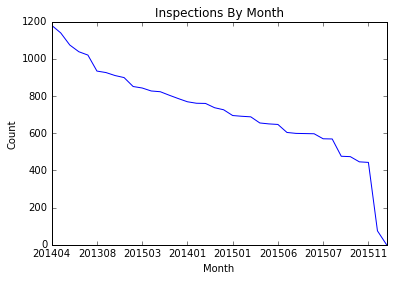

In [73]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap
inspections['date']=inspections['date'].apply(str)
inspections['month'] = inspections.date.apply(lambda x: x[:6])
inspections.sort_index(by='month')


inspections.month.value_counts().plot(kind='line', title='Inspections By Month')
plt.xlabel('Month')
plt.ylabel('Count')


In [89]:
# 5 Which zip code contains the most high risk violations?
df2[df2.risk_category == 'High Risk'].groupby('owner_zip').business_id.count().sort_values(ascending = False).head(1)
#94133, my zip code....

owner_zip
94133    443
Name: business_id, dtype: int64

In [ ]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

#more likely to be characterized as low risk

In [93]:
# 7 Examining the descriptions, what is the most common violation?
violations.groupby('description').business_id.count().sort_values(ascending = False).head(1)

description
Unclean or degraded floors walls or ceilings    3395
Name: business_id, dtype: int64

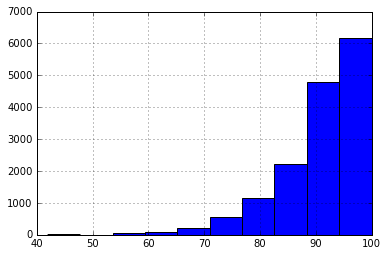

In [96]:
# 8 Create a hist of the scores with 10 bins
inspections.Score.hist(bins=10)

In [97]:
# 9 Can you predict risk category based on the other features in this dataset?
#Yes, we can use logistic regression to classify based on features such as zip code, Score, etc.

In [ ]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [ ]:
############################
### A Little More Morbid ###
############################

In [75]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [99]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings.rename(columns={'lawenforcementagency': 'agency', 'raceethnicity': 'race'}, inplace=True)
killings.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [101]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [105]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings = killings.fillna('Unknown')
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [108]:
# 4. How many killings were there so far in 2015?
killings['year'].value_counts()
#467 kills


2015    467
Name: year, dtype: int64

In [113]:
# 5. Of all killings, how many were male and how many female?
killings.groupby('gender').gender.count().sort_values(ascending = False)
#holy shit..#

gender
Male      445
Female     22
Name: gender, dtype: int64

In [114]:
# 6. How many killings were of unarmed people?
killings.groupby('armed').gender.count().sort_values(ascending = False)
#102

armed
Firearm               230
No                    102
Knife                  68
Other                  26
Vehicle                18
Non-lethal firearm     14
Unknown                 7
Disputed                2
Name: gender, dtype: int64

In [117]:
# 7. What percentage of all killings were unarmed?
102/(230+68+26+18+14+7+2.00)

0.27945205479452057

In [118]:
# 8. What are the 5 states with the most killings?
killings.groupby('state').gender.count().sort_values(ascending = False).head()


state
CA    74
TX    46
FL    29
AZ    25
OK    22
Name: gender, dtype: int64

In [119]:
# 9. Show a value counts of deaths for each race
killings.groupby('race').gender.count().sort_values(ascending = False)


race
White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: gender, dtype: int64

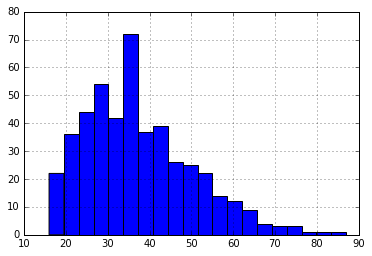

In [122]:
# 10. Display a histogram of ages of all killings
killings.age.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1194903d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119f6c810>]], dtype=object)

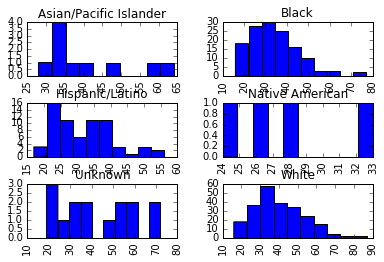

In [124]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race)


In [125]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean().sort_values(ascending = False)


race
Unknown                   43.533333
Asian/Pacific Islander    40.800000
White                     40.466102
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Name: age, dtype: float64

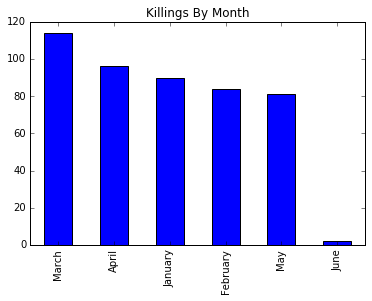

In [126]:
# 13. Show a bar chart with counts of deaths every month
killings.month.value_counts().plot(kind='bar', title='Killings By Month')

In [ ]:
###################
### Less Morbid ###
###################

In [134]:
df = pd.read_csv('./data/college-majors.csv')
df.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [135]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
df.drop(['Employed_full_time_year_round','Major_code'],inplace=True,axis=1)
df.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


In [136]:
# 2. Show the cout of missing values in each column
df.isnull().sum(Median)

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [152]:
# 3. What are the top 10 highest paying majors?
df.groupby('Major').Median.mean().sort_values(ascending = False).head(10)
#df.groupby('Major').P25th.mean().sort_values(ascending = False)
#df.groupby('Major').P75th.mean().sort_values(ascending = False)

#likely petroleum engineering, but mean not provided.


Major
PETROLEUM ENGINEERING                                  125000
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION    106000
NAVAL ARCHITECTURE AND MARINE ENGINEERING               97000
METALLURGICAL ENGINEERING                               96000
NUCLEAR ENGINEERING                                     95000
MINING AND MINERAL ENGINEERING                          92000
MATHEMATICS AND COMPUTER SCIENCE                        92000
ELECTRICAL ENGINEERING                                  88000
CHEMICAL ENGINEERING                                    86000
GEOLOGICAL AND GEOPHYSICAL ENGINEERING                  85000
Name: Median, dtype: int64

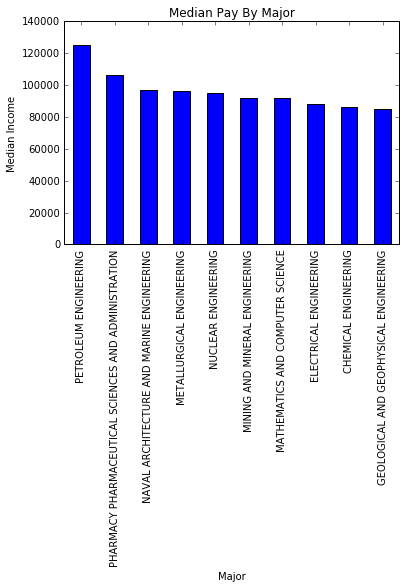

In [155]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
df.groupby('Major').Median.mean().sort_values(ascending = False).head(10).plot(kind='bar', title='Median Pay By Major')
plt.xlabel('Major')
plt.ylabel('Median Income')

In [157]:
# 5. What is the average median salary for each major category?
df.groupby('Major_category').Median.mean().sort_values(ascending = False)


Major_category
Engineering                            77758.620690
Computers & Mathematics                66272.727273
Physical Sciences                      62400.000000
Business                               60615.384615
Health                                 56458.333333
Agriculture & Natural Resources        55000.000000
Social Science                         53222.222222
Law & Public Policy                    52800.000000
Industrial Arts & Consumer Services    52642.857143
Biology & Life Science                 50821.428571
Communications & Journalism            49500.000000
Humanities & Liberal Arts              46080.000000
Psychology & Social Work               44555.555556
Education                              43831.250000
Arts                                   43525.000000
Interdisciplinary                      43000.000000
Name: Median, dtype: float64

In [158]:
# 6. Show only the top 5 paying major categories
df.groupby('Major_category').Median.mean().sort_values(ascending = False).head(5)

Major_category
Engineering                77758.620690
Computers & Mathematics    66272.727273
Physical Sciences          62400.000000
Business                   60615.384615
Health                     56458.333333
Name: Median, dtype: float64

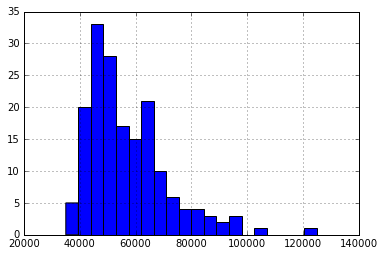

In [159]:
# 7. Plot a histogram of the distribution of median salaries
df.Median.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e6f9950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fcfd0d0>]], dtype=object)

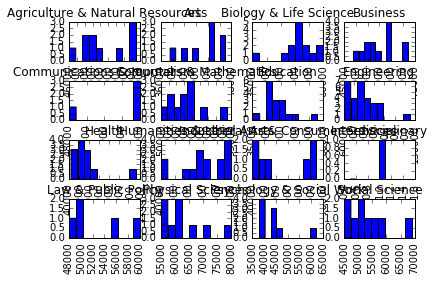

In [160]:
# 8. Plot a histogram of the distribution of median salaries by major category
df.Median.hist(by=df.Major_category)


In [163]:
# 9. What are the top 10 most UNemployed majors?
df.groupby('Major').Unemployed.mean().sort_values(ascending = False).head(10)

Major
BUSINESS MANAGEMENT AND ADMINISTRATION    147261
GENERAL BUSINESS                           85626
PSYCHOLOGY                                 79066
ACCOUNTING                                 75379
COMMUNICATIONS                             54390
ENGLISH LANGUAGE AND LITERATURE            52248
MARKETING AND MARKETING RESEARCH           51839
POLITICAL SCIENCE AND GOVERNMENT           40376
GENERAL EDUCATION                          38742
BIOLOGY                                    36757
Name: Unemployed, dtype: int64

In [174]:
# What are the unemployment rates?
df.groupby('Major').Unemployment_rate.mean().sort_values(ascending = False).head(10)

Major
MISCELLANEOUS FINE ARTS                     0.156147
CLINICAL PSYCHOLOGY                         0.102712
MILITARY TECHNOLOGIES                       0.101796
SCHOOL STUDENT COUNSELING                   0.101746
LIBRARY SCIENCE                             0.094843
VISUAL AND PERFORMING ARTS                  0.094658
COMPUTER PROGRAMMING AND DATA PROCESSING    0.090264
SOCIAL PSYCHOLOGY                           0.087336
ASTRONOMY AND ASTROPHYSICS                  0.086022
ARCHITECTURE                                0.085991
Name: Unemployment_rate, dtype: float64

In [176]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
df.groupby('Major_category').Unemployed.mean().sort_values(ascending = False).head(10)
# What are the unemployment rates?
df.groupby('Major_category').Unemployment_rate.mean().sort_values(ascending = False).head(10)

Major_category
Arts                                   0.087601
Psychology & Social Work               0.077867
Interdisciplinary                      0.077269
Humanities & Liberal Arts              0.069429
Communications & Journalism            0.069125
Law & Public Policy                    0.067854
Social Science                         0.065686
Computers & Mathematics                0.059437
Industrial Arts & Consumer Services    0.058546
Physical Sciences                      0.054541
Name: Unemployment_rate, dtype: float64

In [171]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
df['sample_employment_rate']= df['Employed']/df['Total']
df.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,unemployment_rate,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.018908,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.023771,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.024179,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.034950,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.036820,0.711738


In [177]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"
df['sample_unemployment_rate']= 1- df['sample_employment_rate']
df.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,unemployment_rate,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.018908,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.023771,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.024179,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.034950,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.036820,0.711738,0.288262
